# 数据预处理¶
---
现实的数据往往是充满噪声的，⽽没有⾼质量的数据，就没有⾼质量的数据挖掘结果。所以，我们需要对数据进⾏预处理，以提⾼数据的质量。
数据的质量涉及许多因素，包括：
+ 准确性
+ 完整性
+ ⼀致性
+ 时效性
+ 可信性
+ 可解释性

数据预处理的主要步骤为：
+ 数据清理：通过填写缺失值、光滑噪声数据、识别或删除离群点。并解决不⼀致性来“清理”数据
+ 数据集成：将多个数据源、数据库集成在⼀个
+ 数据规约：将得到的数据进⾏简化，去除冗余数据
+ 数据变换：讲数据进⾏规范化、数据离散化和数据分层，可以使得数据挖掘在多个抽象层次上进⾏。


## 1.数据清洗
现实中的数据⼀般是不完整的、有噪声的和不⼀致的。数据清洗试图填充缺失值、光滑噪声并识别离
群点和纠正数据中的不⼀致。

### 1.1 缺失值
有时候我们获取的数据存在缺失值，这个往往⽤NaN来表示。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

df = pd.DataFrame({'a':[1,2,np.nan,4],          #写的是a这一列的值
                   'b':[2,3,4,np.nan],
                   'c':[3,np.nan,5,6],
                   'd':[4,7,8,9]})

a = [1,2,3,4,5,6,9,10,11,12]
b = [10,16,21,32,35,43,58,62,67,70]

# print('原数据')
# print(df)
# print(df.isnull())
# df.isnull()函数返回df数据帧中的数据是否为NaN值的boolean型数据矩阵，如果数据为NaN，矩阵对应
# 位置为True，否则为False
print(df)
ar = np.array(df)
print(np.isnan(ar))

     a    b    c  d
0  1.0  2.0  3.0  4
1  2.0  3.0  NaN  7
2  NaN  4.0  5.0  8
3  4.0  NaN  6.0  9
[[False False False False]
 [False False  True False]
 [ True False False False]
 [False  True False False]]


In [2]:
class process:
    def __init__(self,data,x,y):

        self.data = data
        self.x = a
        self.y= b



    def delete_data(self,flag):
        if flag==True:
            data = pd.DataFrame(self.data).dropna()  #删除空值所在的行
        if flag == False:
            data = pd.DataFrame(self.data).dropna(axis = 1)   #删除空值所在的列
        return data

    def replace_data(self):
        data = pd.DataFrame(self.data).replace(np.nan,100)  # 用固定值代替
        return data

    def fill_data(self,tag):
        if tag == True:
            data = pd.DataFrame(self.data).fillna(df.mean())  #用平均值填充
        if tag == False:
            data = pd.DataFrame(self.data).fillna(method='bfill')  #向后填充  ffill向前填充
        return data

    def Interpolation(self):
        linear = interpolate.interp1d(self.x,self.y,kind='linear')  #线性插值法根据已知数值构建线性方程组，通过求解线性方程组
        plt.plot(linear([1,2,3,4,5,6,7,8,9,10,11,12]),'-.')         #获取缺失值
        print('线性插值法求出的ss[7:9]=',linear([7,8]))
        lagrange = interpolate.lagrange(self.x,self.y)            #多项式插值是通过拟合多项式，通过多项式求解缺失值，多项式插值中
        plt.plot(lagrange([1,2,3,4,5,6,7,8,9,10,11,12]),'--')     #最常用的是拉格朗日插值法和牛顿插值法
        print('拉格朗日插值法求出的ss[7:9]=',lagrange([7,8]))
        plt.show()

    def spline(self):
        x = np.linspace(-np.pi,np.pi,10)
        y = np.sin(x)
        plt.plot(x,y)
        tck = interpolate.splrep(x,y)
        x_new = np.linspace(-np.pi,np.pi,100)
        y_spine = interpolate.splev(x_new,tck)
        plt.figure()    #同时生成两张图
        plt.plot(x_new,y_spine)
        plt.show()



In [3]:
df1 = process(df,a,b)
print('输出元数据')
print(df1)


输出元数据


In [4]:
print('删除法处理缺失值')
df2 = df1.delete_data(flag=True)
print(df2)


删除法处理缺失值
     a    b    c  d
0  1.0  2.0  3.0  4


In [5]:
print('固定值替换法处理缺失值')
df3 = df1.replace_data()
print(df3)


固定值替换法处理缺失值
       a      b      c  d
0    1.0    2.0    3.0  4
1    2.0    3.0  100.0  7
2  100.0    4.0    5.0  8
3    4.0  100.0    6.0  9


In [6]:
print('填充法处理缺失值')
df4 = df1.fill_data(tag=False)
print(df4)


填充法处理缺失值
     a    b    c  d
0  1.0  2.0  3.0  4
1  2.0  3.0  5.0  7
2  4.0  4.0  5.0  8
3  4.0  NaN  6.0  9


插值法处理缺失值
[1, 2, 3, 4, 5, 6, 9, 10, 11, 12]
[10, 16, 21, 32, 35, 43, 58, 62, 67, 70]
线性插值法求出的ss[7:9]= [48. 53.]
拉格朗日插值法求出的ss[7:9]= [56.48051948 61.55757576]


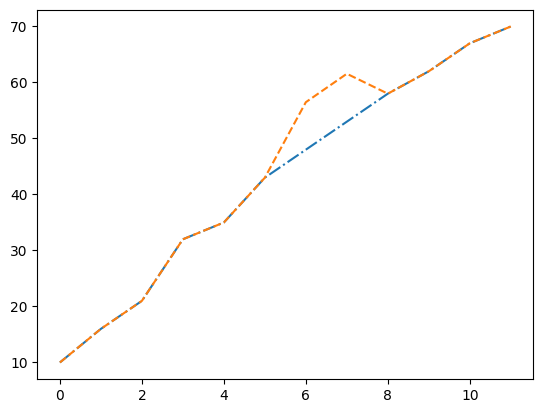

None
样条插值法处理缺失值


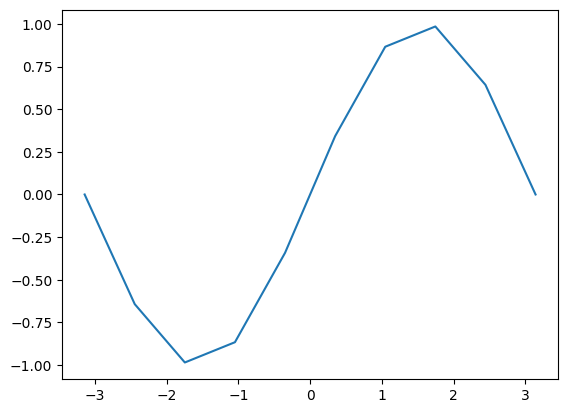

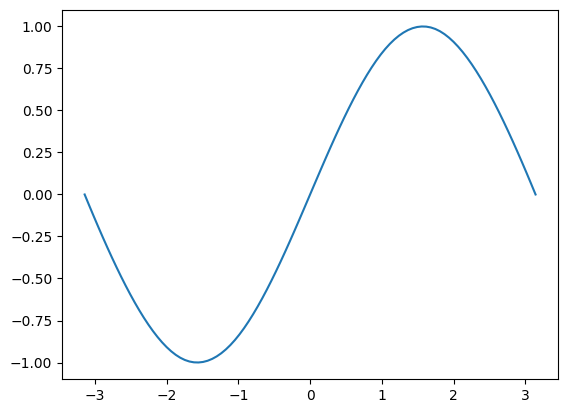

In [7]:
print('插值法处理缺失值')
print(a)
print(b)
df5 = df1.Interpolation()
print(df5)
print('样条插值法处理缺失值')
df1.spline()

+ scipy.interpolate.lagrange

In [8]:
from scipy.interpolate import lagrange
import numpy as np
x = np.array([0, 1, 2])
y = x**3
poly = lagrange(x, y)

In [9]:
from numpy.polynomial.polynomial import Polynomial
Polynomial(poly.coef[::-1]).coef

array([ 0., -2.,  3.])

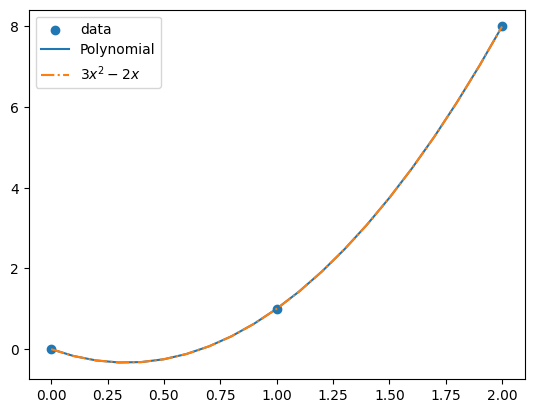

In [10]:
import matplotlib.pyplot as plt
x_new = np.arange(0, 2.1, 0.1)
plt.scatter(x, y, label='data')
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Polynomial')
plt.plot(x_new, 3*x_new**2 - 2*x_new + 0*x_new,
         label=r"$3 x^2 - 2 x$", linestyle='-.')
plt.legend()
plt.show()

**忽略缺失值**

当缺失值较少的时候，我们可以丢弃缺失的元组，⽽缺失值较多的时候，我们需要采取别的⽅法

In [11]:
import numpy as np
import pandas as pd
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
'age': [42, np.nan, 36, 24, 73],
'sex': ['m', np.nan, 'f', 'm', 'f'],
'preTestScore': [4, np.nan, np.nan, 2, 3],
'postTestScore': [25, 30, 56, 62, 70]}
df = pd.DataFrame(raw_data)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25
1,NaN,NaN,NaN,NaN,NaN,30
2,Tina,Ali,36.0,f,NaN,56
3,Jake,Milner,24.0,m,2.0,62
4,Amy,Cooze,73.0,f,3.0,70


In [12]:
## 判断缺失值
print(df)
print(df.isnull())

  first_name last_name   age  sex  preTestScore  postTestScore
0      Jason    Miller  42.0    m           4.0             25
1        NaN       NaN   NaN  NaN           NaN             30
2       Tina       Ali  36.0    f           NaN             56
3       Jake    Milner  24.0    m           2.0             62
4        Amy     Cooze  73.0    f           3.0             70
   first_name  last_name    age    sex  preTestScore  postTestScore
0       False      False  False  False         False          False
1        True       True   True   True          True          False
2       False      False  False  False          True          False
3       False      False  False  False         False          False
4       False      False  False  False         False          False


In [13]:
## 删除缺失值所在的元组（⾏）
df.dropna(axis=0)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25
3,Jake,Milner,24.0,m,2.0,62
4,Amy,Cooze,73.0,f,3.0,70


In [14]:
## 删除缺失值所在的元组（列）
df.dropna(axis=1)

,postTestScore
0,25
1,30
2,56
3,62
4,70


**⼈⼯填写缺失值**

该⽅法对少数缺失值有效，但费时，且当数据⾮常⼤时难以实现

In [15]:
## 将序号 1 的年龄填写为30
df_manual = df.copy()
df_manual.loc[1,'age'] = 30
df_manual

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25
1,NaN,NaN,30.0,NaN,NaN,30
2,Tina,Ali,36.0,f,NaN,56
3,Jake,Milner,24.0,m,2.0,62
4,Amy,Cooze,73.0,f,3.0,70


**使⽤⼀个全局常量填充缺失值**

In [16]:
## ⽤999填充缺失值
df.fillna(value=999)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25
1,999,999,999.0,999,999.0,30
2,Tina,Ali,36.0,f,999.0,56
3,Jake,Milner,24.0,m,2.0,62
4,Amy,Cooze,73.0,f,3.0,70


**使⽤属性中⼼度填充缺失值**

In [17]:
## 给定元组均值
df.fillna(value=df.mean())

C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\770553634.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(value=df.mean())


,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.0,25
1,NaN,NaN,43.75,NaN,3.0,30
2,Tina,Ali,36.00,f,3.0,56
3,Jake,Milner,24.00,m,2.0,62
4,Amy,Cooze,73.00,f,3.0,70


**使⽤最可能的值填充缺失值**

可使⽤是回归、⻉叶斯等⽅法确定最可能的值。也可以使⽤插值法填充。

In [18]:
## 使⽤上⼀个值替代
df.fillna(method='ffill')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25
1,Jason,Miller,42.0,m,4.0,30
2,Tina,Ali,36.0,f,4.0,56
3,Jake,Milner,24.0,m,2.0,62
4,Amy,Cooze,73.0,f,3.0,70


In [19]:
##使⽤线性插值法填充
df.interpolate()

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.000000,25
1,NaN,NaN,39.0,NaN,3.333333,30
2,Tina,Ali,36.0,f,2.666667,56
3,Jake,Milner,24.0,m,2.000000,62
4,Amy,Cooze,73.0,f,3.000000,70


## 1.2 噪声数据
噪声（noise）是被测量的变量的随机误差或⽅差。

分箱（binning）

分箱通过查考数据的“临近”即周围值来光滑有序数据值。由于分箱⽅法考察邻近值，因此它进⾏的是局部光滑。

将数据分为个等频的箱中，可以⽤箱均值、箱中位数或箱边界光滑数据

+ 异常值判别
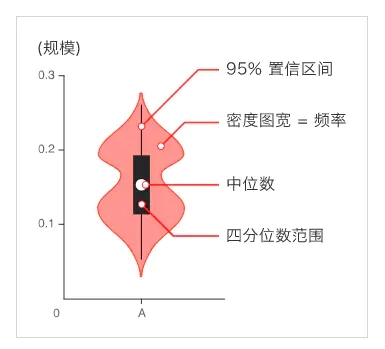

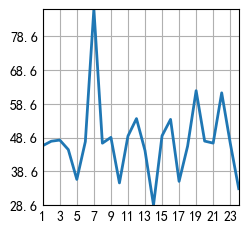

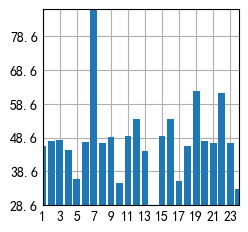

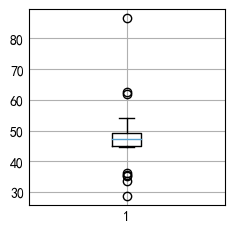

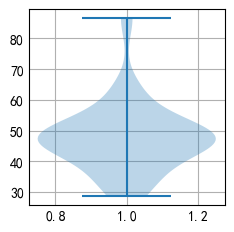

<AxesSubplot: ylabel='SiO2'>

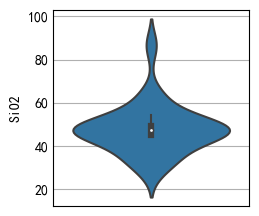

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']     # 用来显示中文标签
plt.rcParams['axes.unicode_minus'] = False       # 用来正常显示负号
plt.style.use('_mpl-gallery')
# 生成异常数据
# df = pd.DataFrame({'coll' : [1, 58, 3, 5, 2, 12, 13], 'col2' : [12, 17, 31, 53, 22, 32, 43]})
# print(df)

sheet_name = '因子分析2'
df = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0) # , index_col= '编号'
x = df['编号']
y = df['SiO2']
# plot
fig, ax1 = plt.subplots()
ax1.plot(x, y, linewidth=2.0)
ax1.set(xlim=(x.min(), x.max()), xticks=np.arange(x.min(), x.max(), step= 2),
       ylim=(y.min(), y.max()), yticks=np.arange(y.min(), y.max(),step= 10))

fig, ax2 = plt.subplots()
ax2.bar(x, y, linewidth=2.0)
ax2.set(xlim=(x.min(), x.max()), xticks=np.arange(x.min(), x.max(), step= 2),
       ylim=(y.min(), y.max()), yticks=np.arange(y.min(), y.max(),step= 10))

fig, ax3= plt.subplots()
ax3.boxplot(y)
# ax3.set(xlim=(x.min(), x.max()), xticks=np.arange(x.min(), x.max(), step= 1),
#        ylim=(y.min(), y.max()), yticks=np.arange(y.min(), y.max(),step= 10))

fig, ax4= plt.subplots()
ax4.violinplot(y)

plt.show()
import seaborn as sns
sns.violinplot(y=y)
# sns.violinplot(data = df.iloc[0:,1:2])


- 3σ准则

In [21]:
import pandas as pd

# 生成异常数据
# df = pd.DataFrame({'coll' : [1, 58, 3, 5, 2, 12, 13], 'col2' : [12, 17, 31, 53, 22, 32, 43]})
# print(df)

sheet_name = '因子分析2'
df = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号')

# 通过Z-Score方法判断异常值
# pandas中，如果b = a，则b is a。所以想要复制它的值，但不关联，就必须深度复制，b = a.copy()。
df_zscore = df.copy()       # 通过df.copy()复制一个原始数据框的副本用来存储Z-Score标准化后的得分      
cols = df.columns           # 获得数据框的列名
for col in cols:
    df_col = df[col]        # 得到每列的值
#     print(df_col)
    mean = df_col.mean()
    std = df_col.std()
    print('平均值',mean)
    print('3倍标准差',3* std)
#     z_score = (df_col - df_col.mean())/df_col.std()     # 计算每列的Z-score得分
#     print(abs((df_col- mean)))
    df_zscore[col] = abs((df_col- mean)) > 3 * std             # 判断Z-score得分是否大于2.2，如果是则是True,否则为False

print(df_zscore)    


平均值 86.33125000000001
3倍标准差 30.858618528702806
平均值 11.080416666666666
3倍标准差 28.368781879490122
平均值 1.5295833333333333
3倍标准差 6.092588735504801
平均值 0.2708333333333333
3倍标准差 1.680417261846903
平均值 47.85
3倍标准差 34.505464217563656
平均值 12.5725
3倍标准差 33.69575089326352
平均值 31.665000000000003
3倍标准差 24.868690110781614
平均值 1.9391666666666663
3倍标准差 5.082183072519987
平均值 1.0983333333333334
3倍标准差 3.0672378170084813
     有机含量   黏土矿物   FeS2    碳酸盐   SiO2  Fe2O3  Al2O3    CaO    MgO
编号                                                               
1   False  False  False  False  False  False  False  False  False
2   False  False  False  False  False  False  False  False  False
3   False  False  False  False  False  False  False  False  False
4   False  False  False  False  False  False  False  False  False
5   False  False  False  False  False  False  False  False  False
6   False  False  False   True  False  False  False  False  False
7   False  False  False  False   True  False  False  False  False
8  

In [22]:
import numpy as np
import pandas as pd
#设置需读取文件的路径
sheet_name = '因子分析2'
data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号')
# print(data)
# 记录方差大于3倍的值
#shape[0]记录行数，shape[1]记录列数
sigmayb = [0]*data.shape[0]

for i in range(0,data.shape[1]):
    print("处理第"+str(i)+"列")
    # 循环 每一列
    lie = data.iloc[:, i].to_numpy()
    #        print(lie)
    mea = np.mean(lie)
    s = np.std(lie, ddof=1)
    # 计算每一列 均值 mea 标准差 s
    print("均值和标准差分别为："+str(mea)+" "+str(s))
    #统计大于三倍方差的行
    for t in range(0,data.shape[0]):
        if (abs(lie[t]-mea) > 3*s):
            print(">3sigma"+" "+str(t)+" "+str(i))
        #将异常值置空
        #            data.iloc[t,i]=' '
        #平均值代替异常值
            data.iloc[t,i]=mea
    print('__________________________')
#将处理后的数据存储到原文件中
data.to_excel(r'./data11.xlsx',sheet_name= sheet_name + '异常值为空', header= True, columns=data.columns)


处理第0列
均值和标准差分别为：86.33125000000001 10.286206176234268
__________________________
处理第1列
均值和标准差分别为：11.080416666666666 9.456260626496707
__________________________
处理第2列
均值和标准差分别为：1.5295833333333333 2.0308629118349337
>3sigma 23 2
__________________________
处理第3列
均值和标准差分别为：0.2708333333333333 0.560139087282301
>3sigma 5 3
__________________________
处理第4列
均值和标准差分别为：47.85 11.501821405854551
>3sigma 6 4
__________________________
处理第5列
均值和标准差分别为：12.5725 11.231916964421174
__________________________
处理第6列
均值和标准差分别为：31.665000000000003 8.289563370260538
__________________________
处理第7列
均值和标准差分别为：1.9391666666666663 1.694061024173329
__________________________
处理第8列
均值和标准差分别为：1.0983333333333334 1.0224126056694938
>3sigma 13 8
__________________________


In [23]:
import numpy as np   #载入numpy库
import pandas as pd   #载入pandas库
sheet_name = '因子分析2'
data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号')
# print(data.columns)
# data.head(5)   #显示数据集的前5行
# print(data.shape[0])   #显示数据集的行数
# print(data.shape[1])   #显示数据集的列数
def three_sigma(x):   #传入某变量  
    mean_value = x.mean()   #计算该变量的均值  
    std_value = x.std()   #计算该变量的标准差  
    rule = (mean_value - 3 * std_value > x) | (x.mean() + 3 * x.std() < x)   #处于(mean-3std,mean+3std)区间外的数据为异常值
    index = np.arange(x.shape[0])[rule]   #获取异常值的行位置索引  
    outlier = x.iloc[index]   #获取异常值的数据  
    print(outlier)
    return outlier   #返回异常值的数据

# print(three_sigma(data["SiO2"]))   #显示变量"fixed acidity"的异常值
for col in data.columns:
    three_sigma(data[col])
    

Series([], Name: 有机含量, dtype: float64)
Series([], Name: 黏土矿物, dtype: float64)
编号
24    8.12
Name: FeS2, dtype: float64
编号
6    2.5
Name: 碳酸盐, dtype: float64
编号
7    86.62
Name: SiO2, dtype: float64
Series([], Name: Fe2O3, dtype: float64)
Series([], Name: Al2O3, dtype: float64)
Series([], Name: CaO, dtype: float64)
编号
14    5.56
Name: MgO, dtype: float64


- 箱型图判断

[]
[]


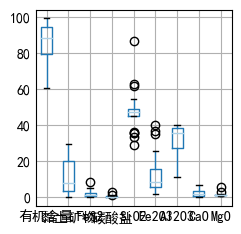

In [24]:
import pandas as pd
sheet_name = '因子分析2'
data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号')
data.head()

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']     # 用来显示中文标签
plt.rcParams['axes.unicode_minus'] = False       # 用来正常显示负号

# data = data['SiO2']

plt.figure()
p = data.boxplot(return_type='dict')                   # 画箱线图，直接使用DataFrame方法
x = p['fliers'][0].get_xdata()       # 'flies'为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort()
print(x)
print(y)
# 用annotate添加注释
# 其中有些相近的点，注释会出现重叠，难以看清，需要一些技巧来控制
# 以下参数都是经过调试的，需要具体问题具体调试
for i in range(len(x)):
    if i>0:
        plt.annotate(y[i], xy = (x[i], y[i]), xytext=(x[i]+0.05 - 0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i], xy = (x[i], y[i]), xytext=(x[i]+0.08,y[i]))
plt.show()

Z-Score判断

In [25]:
import pandas as pd

df = pd.DataFrame({'col1': [1, 120, 3, 5, 2, 12, 13],
                   'col2' : [12, 17, 31, 53, 22, 32, 43]})
print(df)

# 通过Z-Score方法判断异常值
df_zscore = df.copy()   # 通过df.copy()复制一个原始数据框的副本用来存储Z-Score标准化后的得分
for col in df.columns:
    z_score = (df[col] - df[col].mean()) / df[col].std()
    df_zscore[col] = z_score.abs() > 2.2    # 判断Z-score得分是否大于2.2，如果是则是True,否则为False
print(df_zscore)

   col1  col2
0     1    12
1   120    17
2     3    31
3     5    53
4     2    22
5    12    32
6    13    43
    col1   col2
0  False  False
1   True  False
2  False  False
3  False  False
4  False  False
5  False  False
6  False  False


    a  b    c   d  e
0   1  5    9  13  1
1   2  6   10  14  2
2  33  7   11  15  3
3   4  8  122  16  4


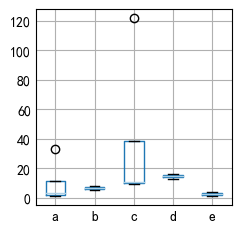

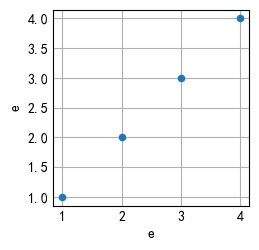

In [26]:
# 噪声数据检测
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'a':[1,2,33,4],
                   'b':[5,6,7,8],
                   'c':[9,10,11,122],
                   'd':[13,14,15,16]})

df['e'] = [1,2,3,4]   # 添加一列e
print(df)
df.boxplot()        # 画箱型图
df.plot(kind='scatter',x='e',y='e')   # 画散点图
plt.show()

In [27]:
data_price = np.array([15,4,8,21,28,21,24,25,34])
data_price

array([15,  4,  8, 21, 28, 21, 24, 25, 34])

In [28]:
## 对数据进⾏排序
data_price.sort()
data_price

array([ 4,  8, 15, 21, 21, 24, 25, 28, 34])

In [29]:
## 将数据进⾏分箱， 分3个箱
data_box = data_price.reshape([3,-1])
data_box

array([[ 4,  8, 15],
       [21, 21, 24],
       [25, 28, 34]])

In [30]:
## ⽤箱均值光滑
np.repeat(data_box.mean(axis=1), 3)

array([ 9.,  9.,  9., 22., 22., 22., 29., 29., 29.])

In [31]:
## ⽤箱中位数光滑
np.repeat(np.median(data_box, axis=1), 3)

array([ 8.,  8.,  8., 21., 21., 21., 28., 28., 28.])

In [32]:
from scipy import stats
values = [1.0, 1.0, 2.0, 1.5, 3.0]
stats.binned_statistic([1, 1, 2, 5, 7], values, 'mean', bins=3)

BinnedStatisticResult(statistic=array([1.33333333,        nan, 2.25      ]), bin_edges=array([1., 3., 5., 7.]), binnumber=array([1, 1, 1, 3, 3], dtype=int64))

In [33]:
## ⽤箱边界光滑
np.repeat(data_box.max(axis=1), 3)

array([15, 15, 15, 24, 24, 24, 34, 34, 34])

### 重复数据处理

In [34]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'a':np.random.randint(1,3,1000),'b':np.random.randint(3,5,1000),
                   'c':np.random.randint(5,7,1000)})
print('原数据\n',df)
print('原数据shape',df.shape)
# print(df.duplicated()[1])
num_false = 0
num_true = 0
for i in range(df.shape[0]):
    if (df.duplicated()[i] == True):
        num_true = num_true+1
    else:
        num_false = num_false+1
print('不重复的行（第一次出现）',num_false)
print('重复行',num_true)
print(df.duplicated())
df1 = df.drop_duplicates()
print('去重后的数据shape',df1.shape)
print('去重后原数据shape不变',df.shape)
'''
drop_duplicates()函数可以删除重复记录。
参数subset用于识别重复的列标签或列标签序列，默认None表示所有列标签
参数keep是特定字符串，表示重复时保留哪个记录数据。first表示第一条，last表示保留最后一条
false表示重复的都不保留，默认为first
参数inplace是一个布尔值，表示是否在原数据上进行操作，默认为False，当inplace为True时，drop_duplicates()函数
没有返回值，原DataFrame数据发生修改。
'''
df.drop_duplicates(subset=('a','b'),keep='last',inplace=True)
print(df)
print(df.shape)

原数据
      a  b  c
0    2  3  6
1    2  4  5
2    2  4  5
3    1  4  6
4    1  4  6
..  .. .. ..
995  2  3  5
996  2  4  6
997  2  4  6
998  2  4  6
999  1  4  5

[1000 rows x 3 columns]
原数据shape (1000, 3)
不重复的行（第一次出现） 8
重复行 992
0      False
1      False
2       True
3      False
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Length: 1000, dtype: bool
去重后的数据shape (8, 3)
去重后原数据shape不变 (1000, 3)
     a  b  c
987  1  3  6
995  2  3  5
998  2  4  6
999  1  4  5
(4, 3)


## 2. 数据规范化
### 2.1 最⼤最⼩规范化(min-max scaled)
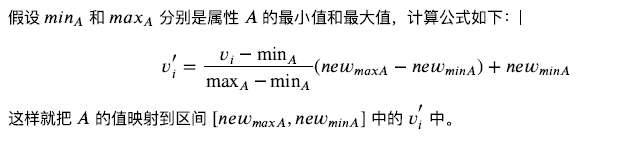

In [35]:
## min-max scale
from sklearn import preprocessing
X_train = np.array([[ 1., -1., 2.],
                    [ 2., 0., 0.],
                    [ 0., 1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler() # 默认各列数按照均值归一化到【0，1】区间
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [36]:
## min-max scale
from sklearn import preprocessing
X_train = np.array([[ 1., -1., 2.],
                    [ 2., 0., 0.],
                    [ 0., 1., -1.]])
min_max_scaler = preprocessing.MaxAbsScaler() # 默认各列数按照均值归一化到【-1，1】区间
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.DataFrame(
    {
        'a':[1,2,3],
        'b':[5,6,6],
        'c':[9,100,2]
    }
)
print(data.values)
#归一化(MinMaxScaler)
min_max_scaler = MinMaxScaler(feature_range=[0,10])
min_max_scaler_data=min_max_scaler.fit_transform(data)
print(min_max_scaler_data)

[[  1   5   9]
 [  2   6 100]
 [  3   6   2]]
[[ 0.          0.          0.71428571]
 [ 5.         10.         10.        ]
 [10.         10.          0.        ]]


### 2.2 Z-score 规范化（零均值规范化）
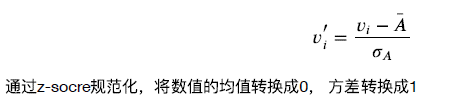

In [38]:
X_scaled = preprocessing.scale(X_train)
X_scaled


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [39]:
X_scaled.mean()

4.9343245538895844e-17

In [40]:
X_scaled.var()

1.0

### 2.3⼩数定标
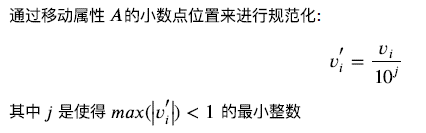

In [41]:
X_train / 10

array([[ 0.1, -0.1,  0.2],
       [ 0.2,  0. ,  0. ],
       [ 0. ,  0.1, -0.1]])

### 2.4 连续数据离散化


+ 等宽法

In [42]:
import pandas as pd
ages=[20,22,25,27,21,23,37,31,61,45,41,32]
# 返回的是一个特殊的Categorical对象 → 一组表示面元名称的字符串
bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)
print(cats)
print(type(cats))
print('-------')

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
<class 'pandas.core.arrays.categorical.Categorical'>
-------


In [43]:
# cut结果含有一个表示不同分类名称的层级数组以及一个年龄数据进行标号的代号属性
print(cats.codes, type(cats.codes))  # 0-3对应分组后的四个区间，用代号来注释数据对应区间，结果为ndarray
print(cats.categories, type(cats.categories))  # 四个区间，结果为index
print(pd.value_counts(cats))  # 按照区间计数
print('-------')


[0 0 0 1 0 0 2 1 3 2 2 1] <class 'numpy.ndarray'>
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]') <class 'pandas.core.indexes.interval.IntervalIndex'>
(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64
-------


In [44]:
# 通过right函数修改闭端，默认为True
print(pd.cut(ages,[18,26,36,61,100],right=False))
print('-------')

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]
-------


In [45]:
# 可以设置自己的区间名称，用labels参数
group_names=['Youth','YoungAdult','MiddleAged','Senior']
print(pd.cut(ages,bins,labels=group_names))
print('-------')

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']
-------


In [46]:
# 对一个Dataframe数据进行离散化，并计算各个区间的数据计数
df = pd.DataFrame({'ages':ages})
group_names=['Youth','YoungAdult','MiddleAged','Senior']
s = pd.cut(df['ages'],bins)  # 也可以 pd.cut(df['ages'],5),将数据等分为5份
df['label'] = s
cut_counts = s.value_counts(sort=False) 
print(df)
print(cut_counts)


    ages      label
0     20   (18, 25]
1     22   (18, 25]
2     25   (18, 25]
3     27   (25, 35]
4     21   (18, 25]
5     23   (18, 25]
6     37   (35, 60]
7     31   (25, 35]
8     61  (60, 100]
9     45   (35, 60]
10    41   (35, 60]
11    32   (25, 35]
(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: ages, dtype: int64


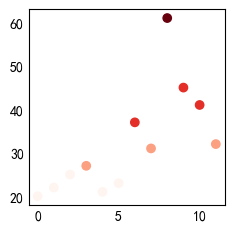

In [47]:
# 用散点图表示，其中颜色按照codes分类
# 注意codes是来自于Categorical对象
plt.scatter(df.index,df['ages'],cmap = 'Reds',c = cats.codes)
plt.grid()

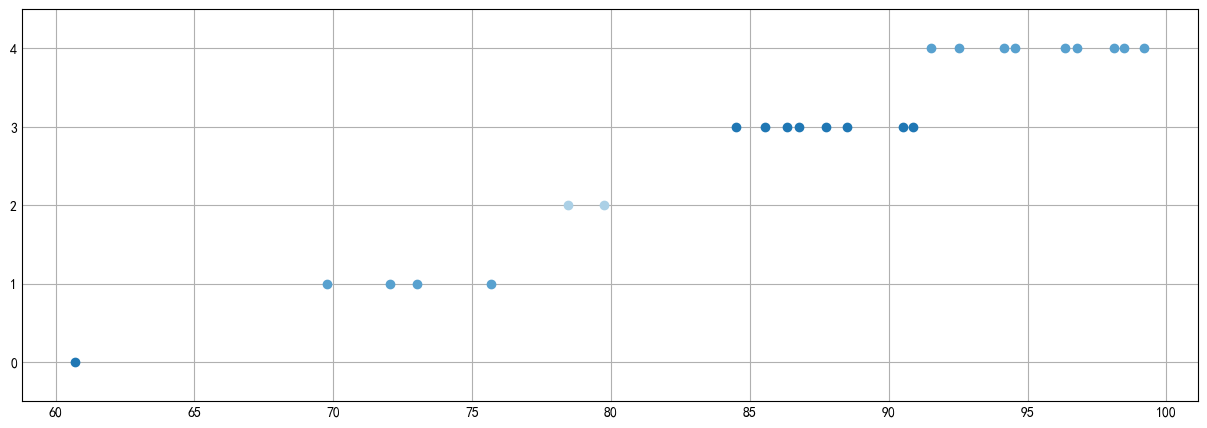

In [48]:
#-*- coding:utf-8 -*- #数据离散化-等宽离散
import pandas as pd
sheet_name = '因子分析2'
data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号')

data = data[u'有机含量'].copy()
k = 5 #设置离散之后的数据段为5 #等宽离散 
d1 = pd.cut(data,k,labels =range(k))#将回款金额等宽分成k类，命名为0,1,2,3,4,5，data经过cut之后生成了第一列为索引，第二列为当前行的回款金额被划分为0-5的哪一类，属于3这一类的第二列就显示为3

def cluster_plot(d,k):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus']= False 
    plt.figure(figsize = (12,4)) 
    for j in range(0,k):
        plt.plot(data[d==j],[j for i in d[d==j]],'o')
        plt.ylim(-0.5, k-0.5) 
    return plt 
cluster_plot(d1,k).show()

+ 等频法
→ 以相同数量的记录放进每个区间

qcut → 根据样本分位数对数据进行面元划分，得到大小基本相等的面元，但并不能保证每个面元含有相同数据个数

可以设置自定义的分位数（0到1之间的数值，包含端点） → pd.qcut(data1,[0,0.1,0.5,0.9,1])


In [49]:
data = np.random.randn(1000)
s = pd.Series(data)
cats = pd.qcut(s,4)  # 按四分位数进行切割，可以试试 pd.qcut(data,10)
print(cats.head())
print(pd.value_counts(cats))
print('------')


0    (-0.688, -0.0345]
1    (-0.688, -0.0345]
2      (-0.0345, 0.65]
3     (-3.807, -0.688]
4    (-0.688, -0.0345]
dtype: category
Categories (4, interval[float64, right]): [(-3.807, -0.688] < (-0.688, -0.0345] < (-0.0345, 0.65] < (0.65, 3.641]]
(-3.807, -0.688]     250
(-0.688, -0.0345]    250
(-0.0345, 0.65]      250
(0.65, 3.641]        250
dtype: int64
------


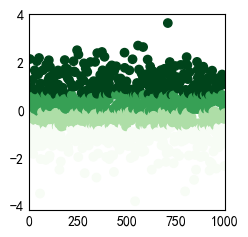

In [50]:
# 用散点图表示，其中颜色按照codes分类
# 注意codes是来自于Categorical对象
plt.scatter(s.index,s,cmap = 'Greens',c = pd.qcut(data,4).codes)
plt.xlim([0,1000])
plt.grid()

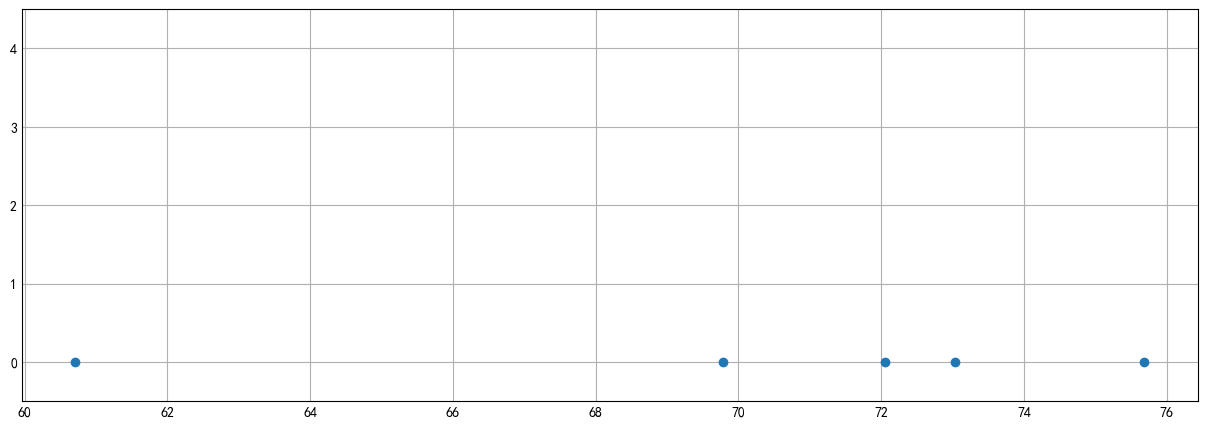

In [51]:
#-*- coding:utf-8 -*- #数据离散化-等频离散
import pandas as pd
sheet_name = '因子分析2'
data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号')

data = data[u'有机含量'].copy()
k = 5 #设置离散之后的数据段为5 #等宽离散 
w = [1.0*i/k for i in range(k+1)]
w = data.describe(percentiles = w)[4:4+k+1] 
w[0] = w[0]*(1-1e-10)

d2 = pd.cut(data, w, labels = range(k))
def cluster_plot(d,k): 
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False 
    plt.figure(figsize = (12,4)) 
    for j in range(0,k): 
        plt.plot(data[d==j], [j for i in d[d==j]],'o')
        plt.ylim(-0.5,k-0.5) 
        return plt 
cluster_plot(d2, k).show()

+ 聚类离散

In [52]:
#-*- coding:utf-8 -*- #数据离散化-聚类离散
import pandas as pd
from sklearn.cluster import KMeans #导入K均值聚类算法
sheet_name = '因子分析2'
result = pd.DataFrame()
processedfile = './data_processed.xls' #数据处理后文件
data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号')
print(data)
col = list(data.columns)
# print(col)
val = [chr(i) for i in range(ord('a'),ord('i')+1)]
# print(val)
typelabel = {}
# list = list(zip(col,val))
for (k,v) in zip(col,val): 
    typelabel[k] = v
# print(typelabel)
# print(typelabel.keys())
keys = list(typelabel.keys())
# print(keys)
k = 4
if __name__ == '__main__': #判断是否主窗口运行，这句代码的作用比较神奇，有兴趣了解的读取请自行搜索相关材料。
  for i in range(len(keys)):
    #调用k-means算法，进行聚类离散化
    print(u'正在进行“%s”的聚类...' % keys[i])
    kmodel = KMeans(n_clusters = k) #n_jobs是并行数，一般等于CPU数较好
#     print(data[keys[i]])
    kmodel.fit(data[[keys[i]]]) #训练模型
    print(kmodel.cluster_centers_)
    r1 = pd.DataFrame(kmodel.cluster_centers_, columns = [typelabel[keys[i]]]) #聚类中心
    #print('r1',r1,kmodel.labels_)
    r2 = pd.Series(kmodel.labels_).value_counts() #分类统计
    r2 = pd.DataFrame(r2, columns = [typelabel[keys[i]]+'n']) #转为DataFrame，记录各个类别的数目

    r = pd.concat([r1, r2], axis = 1).sort_values(typelabel[keys[i]]) #匹配聚类中心和类别数目
    r.index = [1, 2, 3, 4]
#     print('r-1',r)
    r[typelabel[keys[i]]] = r[typelabel[keys[i]]].rolling(2).mean() #rolling_mean()用来计算相邻2列的均值，以此作为边界点。
#     print('r-2', r)
    r.iloc[0,0] = 0.0 #这两句代码将原来的聚类中心改为边界点。
#     print('r-3', r)
    result = result.append(r.T)

  result = result.sort_index() #以Index排序，即以A,B,C,D,E,F顺序排
  result.to_excel(processedfile)

     有机含量   黏土矿物  FeS2   碳酸盐   SiO2  Fe2O3  Al2O3   CaO   MgO
编号                                                           
1   86.76  12.25  0.00  0.40  46.20   5.26  34.55  3.58  1.30
2   92.52   7.32  0.00  0.16  47.52   3.68  37.70  1.95  0.59
3   96.79   3.07  0.17  0.00  47.86   7.82  36.77  1.38  0.63
4   85.56  13.03  0.94  0.47  45.04   7.44  36.06  3.43  0.65
5   87.75  10.26  1.23  0.76  36.22  24.29  29.25  3.23  1.15
6   75.69  24.06  0.00  2.50  47.40   3.76  40.00  0.97  1.15
7   99.21   0.63  0.16  0.00  86.62   8.87  31.75  2.82  0.96
8   84.50  14.46  1.04  0.00  46.94  14.59  37.35  2.20  0.89
9   94.14   5.86  0.00  0.00  48.66   8.41  38.42  0.51  0.67
10  90.50   6.72  2.78  0.00  35.18   1.58  30.11  0.51  0.59
11  72.05  26.49  1.46  0.00  49.04   5.19  39.28  0.05  0.74
12  98.10   1.71  0.00  0.00  54.22   5.79  32.04  1.33  0.63
13  96.35   3.13  0.26  0.00  44.76  36.54  36.20  0.67  0.70
14  98.48   0.00  1.08  0.44  28.60  17.67  24.37  3.37  5.56
15  88.5

C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(r.T)


正在进行“黏土矿物”的聚类...
[[12.5  ]
 [ 1.86 ]
 [24.04 ]
 [ 6.554]]
正在进行“FeS2”的聚类...


C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(r.T)


[[1.22142857]
 [3.722     ]
 [8.12      ]
 [0.13      ]]
正在进行“碳酸盐”的聚类...


C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(r.T)


[[0.382]
 [2.5  ]
 [0.01 ]
 [0.965]]
正在进行“SiO2”的聚类...
[[48.02125]
 [62.16   ]
 [33.824  ]
 [86.62   ]]
正在进行“Fe2O3”的聚类...


C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(r.T)
C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(r.T)


[[37.16666667]
 [ 9.23333333]
 [22.40666667]
 [ 4.43555556]]
正在进行“Al2O3”的聚类...


C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(r.T)


[[14.55      ]
 [37.75923077]
 [25.5725    ]
 [30.7875    ]]
正在进行“CaO”的聚类...


C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(r.T)


[[6.5       ]
 [1.76666667]
 [3.56857143]
 [0.446     ]]
正在进行“MgO”的聚类...
[[0.70466667]
 [5.56      ]
 [1.12285714]
 [2.37      ]]


C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(r.T)
C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(r.T)
C:\Users\xyt556\AppData\Local\Temp\ipykernel_35720\1108015314.py:45: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  result.to_excel(process

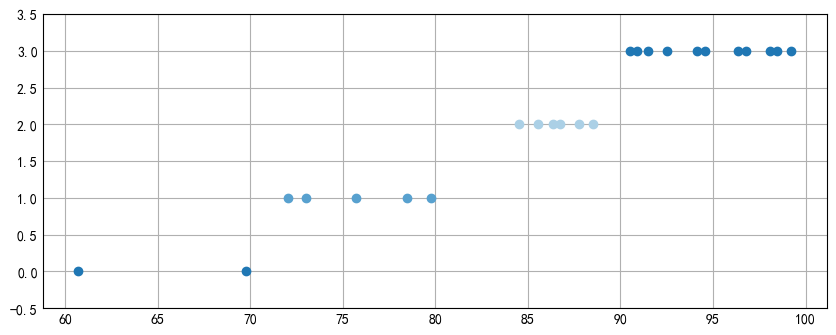

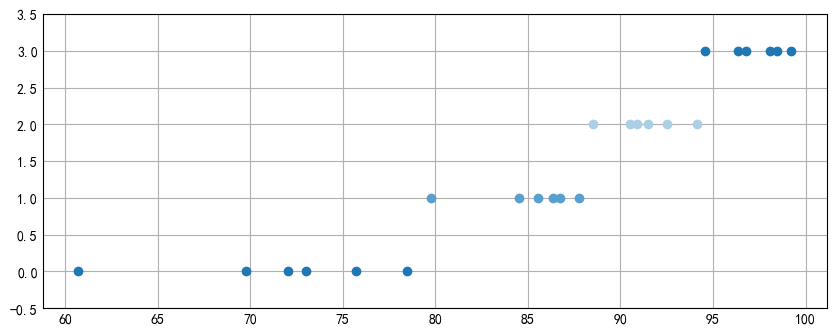

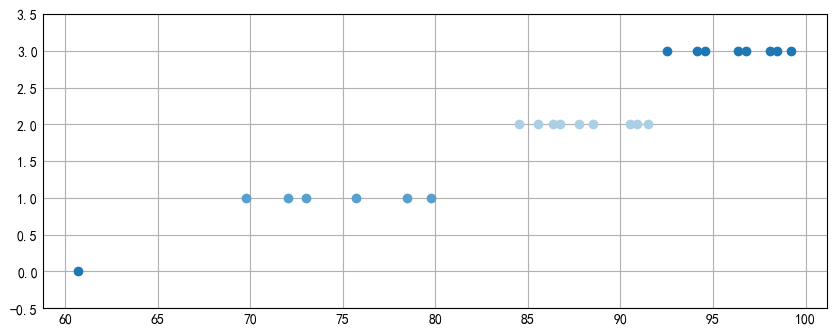

In [53]:
#-*- coding:utf-8 -*- #数据离散化-等宽离散
import pandas as pd
sheet_name = '因子分析2'
data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号')

data = data[u'有机含量'].copy()

k = 4 #分类数
 
d1 = pd.cut(data, k, labels = range(k)) #等宽离散化,各个类别依次命名为,1,2,3 保存的是index 的分类
 
#等频离散化
w = [1.0*i/k for i in range(k+1)]  #创建一个列表，确定分位数0%，25%，50%，75%，100%
w=data.describe(percentiles=w)[4:4+k+1] #利用describe函数计算分位数，取出分位数
w[0]=w[0]*(1-1e-10)  #保证小于最小值
d2=pd.cut(data,w,labels=range(k)) 
 
from sklearn.cluster import KMeans #引入KMeanms
 
kmodel = KMeans(n_clusters = k) #建立模型，簇数为k，n_jobs一般为CPU数
kmodel.fit(data.values.reshape((len(data),1))) #训练模型
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0) #输出聚类中心，并且排序
w = c.rolling(2).mean().iloc[1:] #用滑动窗口求均值的方法求相邻两项求中点，作为边界点
w = [0] + list(w[0]) + [data.max()] #把首末边界点加上
d3 = pd.cut(data, w, labels = range(k))
 
def cluster_plot(d, k): #自定义作图函数来显示聚类结果
	import matplotlib.pyplot as plt
	plt.rcParams['font.sans-serif'] = ['SimHei'] #用来显示中文标签
	plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
	plt.figure(figsize = (8, 3)) #图的大小
	for j in range(0,  k):
		plt.plot(data[d==j], [j for i in d[d==j]], 'o')
 
	plt.ylim(-0.5, k-0.5)
	return plt
 
cluster_plot(d1, k).show()
cluster_plot(d2, k).show()
cluster_plot(d3, k).show()

## 4. 主成分分析
主成分分析（principal components anaylysis）主要是利⽤降维的思想，在损失很少信息的前提下减
少数据的维度，通常将转化⽣成的综合指标称为主成分。每个主成分都是原始变量的线性组合，且各
个主成分之间互不相关。

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['simhei']

In [55]:
sheet_name = '因子分析2'
data = pd.read_excel(r'.\data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号')
data.head()

,有机含量,黏土矿物,FeS2,碳酸盐,SiO2,Fe2O3,Al2O3,CaO,MgO
编号,,,,,,,,,
1,86.76,12.25,0.00,0.40,46.20,5.26,34.55,3.58,1.30
2,92.52,7.32,0.00,0.16,47.52,3.68,37.70,1.95,0.59
3,96.79,3.07,0.17,0.00,47.86,7.82,36.77,1.38,0.63
4,85.56,13.03,0.94,0.47,45.04,7.44,36.06,3.43,0.65
5,87.75,10.26,1.23,0.76,36.22,24.29,29.25,3.23,1.15


In [56]:
### 标准化
X = (data - data.mean()) / data.std()
## 导⼊主成分库，并先选择所有主成分
from sklearn.decomposition import PCA
pca = PCA(n_components = X.shape[1])
## 训练数据
pca.fit(X)

PCA(n_components=9)

In [57]:
## 展示⽅差解释⼒度
pd.DataFrame({'⽅差': pca.explained_variance_,
'贡献度':pca.explained_variance_ratio_,
'累计贡献度':pca.explained_variance_ratio_.cumsum()})

,⽅差,贡献度,累计贡献度
0,3.187244,0.354138,0.354138
1,1.924249,0.213805,0.567944
2,1.297889,0.144210,0.712154
3,0.894855,0.099428,0.811582
4,0.782248,0.086916,0.898498
5,0.471633,0.052404,0.950902
6,0.304423,0.033825,0.984727
7,0.132402,0.014711,0.999438
8,0.005058,0.000562,1.000000


Text(0.5, 1.0, '贡献度')

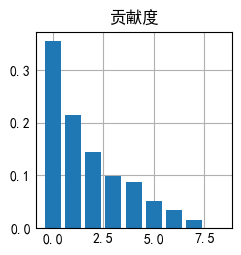

In [58]:
plt.bar(range(9), pca.explained_variance_ratio_)
plt.title('贡献度')

In [59]:
## 选择前两个作为主成分
pca.n_components = 2
pca.fit(X)

PCA(n_components=2)

In [60]:
## 主成分系数：
pd.DataFrame(pca.components_, columns=data.columns)

,有机含量,黏土矿物,FeS2,碳酸盐,SiO2,Fe2O3,Al2O3,CaO,MgO
0,0.346099,-0.415827,0.153554,-0.056662,-0.243399,0.441479,-0.452371,0.437000,0.175379
1,-0.530933,0.407308,0.614471,-0.085898,-0.247225,0.237070,-0.216633,0.001552,-0.054789


In [61]:
## 主成分
y = pd.DataFrame(pca.transform(X), index=data.index)
y

,0,1
编号,,
1,-0.117806,-0.657938
2,-0.487131,-1.238278
3,-0.061425,-1.464053
4,-0.250849,-0.222544
5,1.191992,0.284599
6,-2.302809,-0.094129
7,0.049596,-2.393226
8,-0.399982,0.058470
9,-0.587475,-1.309336


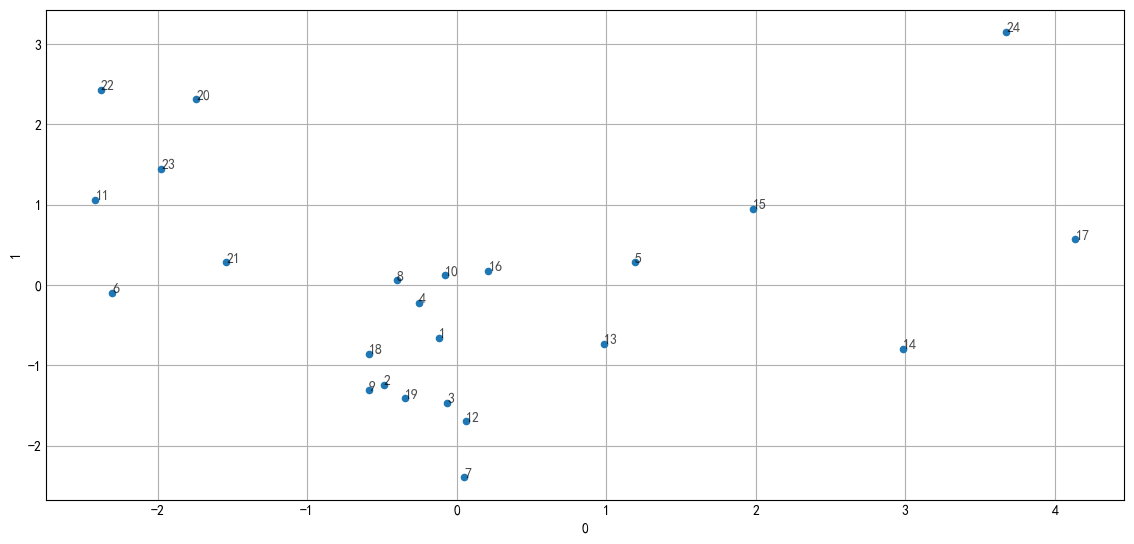

In [62]:
plt.figure(dpi=100, figsize=(11,5))
ax = plt.subplot(111)
y.plot.scatter(0,1, ax=ax, alpha=1)
for i in range(y.shape[0]):
    ax.annotate(data.index[i], (y.iloc[i,0], y.iloc[i,1]),alpha=0.7)